# B-Lazy: Python package for solution speciation using iPHREEQC

## Worked Example

The following goes throught the process of loading and trying to run some data which fails to run correctly. We then go through the steps listed in the error message to correctlt run the data.

In [1]:
import matplotlib.pyplot as plt
from blazy import iphreeqc, load_reference_data, list_databases

/home/oscar/miniconda3/envs/py3/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


### Load Data

In [2]:
# this loads the built-in reference database, which we'll use as an example.
dat = load_reference_data()

# dat could be any pandas.DataFrame (e.g. loaded from your own data file)
# where each row is a single solution

In [3]:
dat.head()  # take a look at the columns it contains

,pH,T (°C),[Na] (m),[K] (m),[Mg] (m),[Ca] (m),[Cl] (m),[SO4] (m),[B] (m),Ion. Str. (I),Salinity,pKB,K1_carb,K2_carb,reference,solution,units,pHscale
0,7,25,NaN,0.080157,NaN,NaN,0.080157,NaN,0.01,0.1,NaN,9.016,NaN,NaN,Dickson (1990) J. Chem. Eng.,KCl,mol/kgw,free?
1,7,25,NaN,0.280150,NaN,NaN,0.280150,NaN,0.01,0.3,NaN,8.939,NaN,NaN,Dickson (1990) J. Chem. Eng.,KCl,mol/kgw,free?
2,7,25,NaN,0.480243,NaN,NaN,0.480243,NaN,0.01,0.5,NaN,8.907,NaN,NaN,Dickson (1990) J. Chem. Eng.,KCl,mol/kgw,free?
3,7,25,NaN,0.980617,NaN,NaN,0.980617,NaN,0.01,1.0,NaN,8.899,NaN,NaN,Dickson (1990) J. Chem. Eng.,KCl,mol/kgw,free?
4,7,25,NaN,1.484688,NaN,NaN,1.484688,NaN,0.01,1.5,NaN,8.910,NaN,NaN,Dickson (1990) J. Chem. Eng.,KCl,mol/kgw,free?


### Set up B-Lazy for calculating your solution chemistry

In [4]:
# create an iphreeqc 'object' which will do all the calculations
solcalc = iphreeqc(database='pitzer')

Using pitzer.dat
   Pitzer.DAT for calculating pressure dependence of reactions
   and temperature dependence to 200 �C. With
   molal volumina of aqueous species and of minerals, and
   critical temperatures and pressures of gases used in Peng-Robinson's EOS.
   Details are given at the end of this file.


In [5]:
# You can view all available databases using:
# list_databases()

In [6]:
# Calculate speciation
out = solcalc.run(dat)

out.head()
# you'll see here that it provides an output, but it hasn't run correctly.
# This is because, as the warning says, there a numerous columns that aren't valid species in the pitzer database.
# In fact, it's only reading the 'pH' column from the file.

/home/oscar/GitHub/blazy/blazy/phreeqc/parser.py:506: UserWarning: 

There were columns in your inputs which aren't valid in the pitzer database.
We have either tried to substitute them with valid inputs or removed them.
Invalid columns which we have removed:
   - T (°C)
   - [Na] (m)
   - [K] (m)
   - [Mg] (m)
   - [Ca] (m)
   - [Cl] (m)
   - [SO4] (m)
   - [B] (m)
   - Ion. Str. (I)
   - Salinity
   - pKB
   - K1_carb
   - K2_carb
   - reference
   - solution
   - units
   - pHscale
Please make sure these substitions/removals make sense!
If they don't please manually specify links between column names
and valid species in your chosen database.

Create a lookup dictionary linking column names to valid species names {'column_name': 'species_name'},
then prepare your data for input using the `.select_inputs()` function.

To see a list of valid species names for pitzer.dat, use the `.list_valid_species()` function.
  warnings.warn(msg)


general                                                                 \
      sim   state soln dist_x  time step   pH   pe temp(C)   Alk(eq/kgw)   
0       1  i_soln    0  -99.0 -99.0  -99  7.0  4.0    25.0  1.216293e-09   
1       1  i_soln    1  -99.0 -99.0  -99  7.0  4.0    25.0  1.216293e-09   
2       1  i_soln    2  -99.0 -99.0  -99  7.0  4.0    25.0  1.216293e-09   
3       1  i_soln    3  -99.0 -99.0  -99  7.0  4.0    25.0  1.216293e-09   
4       1  i_soln    4  -99.0 -99.0  -99  7.0  4.0    25.0  1.216293e-09   

                molality (mol/kgw)               log10(activity)       
             mu                OH-            H+             OH-   H+  
0  1.006454e-07       1.012535e-07  1.000373e-07       -6.994752 -7.0  
1  1.006454e-07       1.012535e-07  1.000373e-07       -6.994752 -7.0  
2  1.006454e-07       1.012535e-07  1.000373e-07       -6.994752 -7.0  
3  1.006454e-07       1.012535e-07  1.000373e-07       -6.994752 -7.0  
4  1.006454e-07       1.012535e-07  1.000373e-07       -6.994752 -7.0

In [7]:
# the bottom of the warning above tells us to use the '.list_valid_species' function to find out what valid species are, so:
solcalc.list_valid_species()

Valid Species for pitzer.dat:

Species Name   Species   Alk    Gram Formula    Weight
  Alkalinity     CO3-2     1   Ca0.5(CO3)0.5     50.05
           B    B(OH)3     0               B     10.81
          Ba      Ba+2     0              Ba    137.33
          Br       Br-     0              Br    79.904
           C     CO3-2     2            HCO3   12.0111
        C(4)     CO3-2     2            HCO3   12.0111
          Ca      Ca+2     0              Ca     40.08
          Cl       Cl-     0              Cl    35.453
           E        e-     0             0.0       0.0
          Fe      Fe+2     0              Fe    55.847
           H        H+    -1               H     1.008
        H(1)        H+    -1             0.0
           K        K+     0               K   39.0983
          Li       Li+     0              Li     6.941
          Mg      Mg+2     0              Mg    24.305
          Mn      Mn+2     0              Mn    54.938
          Na       Na+     0              Na

In [8]:
# make a 'lookup dictionary' of containing {column_name: phreeqc_name} pairs
column_lookup = {
    'pH': 'pH',
    'T (°C)': 'temperature',
    '[Na] (m)': 'Na',
    '[K] (m)': 'K',
    '[Mg] (m)': 'Mg',
    '[Ca] (m)': 'Ca',
    '[Cl] (m)': 'Cl',
    '[SO4] (m)': 'SO4',  # note this is a 'species' not a 'valid species name'. Included as an example of automatically catching these errors.
    '[B] (m)': 'B',
    'units': 'unit',
}

# there's potential to automate this bit but it's challenging to do reliably for 
# all cases, so I tend towards leaving it manual. There's a sanity-check on this later.

In [9]:
# use select_inputs() to turn your data into a useable
inputs = solcalc.select_inputs(dat, column_lookup)

# this gives us a valid input dataframe
inputs.head()

/home/oscar/GitHub/blazy/blazy/phreeqc/parser.py:506: UserWarning: 

There were columns in your inputs which aren't valid in the pitzer database.
We have either tried to substitute them with valid inputs or removed them.
Invalid columns which we were able to substitute:
   - SO4 --> S(6)
Please make sure these substitions/removals make sense!
If they don't please manually specify links between column names
and valid species in your chosen database.

Create a lookup dictionary linking column names to valid species names {'column_name': 'species_name'},
then prepare your data for input using the `.select_inputs()` function.

To see a list of valid species names for pitzer.dat, use the `.list_valid_species()` function.
  warnings.warn(msg)


,pH,temperature,Na,K,Mg,Ca,Cl,S(6),B,unit
0,7,25,NaN,0.080157,NaN,NaN,0.080157,NaN,0.01,mol/kgw
1,7,25,NaN,0.280150,NaN,NaN,0.280150,NaN,0.01,mol/kgw
2,7,25,NaN,0.480243,NaN,NaN,0.480243,NaN,0.01,mol/kgw
3,7,25,NaN,0.980617,NaN,NaN,0.980617,NaN,0.01,mol/kgw
4,7,25,NaN,1.484688,NaN,NaN,1.484688,NaN,0.01,mol/kgw


In [10]:
# which can be run in phreeqc
out = solcalc.run(inputs)

out.head()

general                                                               ...  \
      sim   state soln dist_x  time step   pH   pe temp(C) Alk(eq/kgw)  ...   
0       1  i_soln    0  -99.0 -99.0  -99  7.0  4.0    25.0    0.000074  ...   
1       1  i_soln    1  -99.0 -99.0  -99  7.0  4.0    25.0    0.000086  ...   
2       1  i_soln    2  -99.0 -99.0  -99  7.0  4.0    25.0    0.000092  ...   
3       1  i_soln    3  -99.0 -99.0  -99  7.0  4.0    25.0    0.000102  ...   
4       1  i_soln    4  -99.0 -99.0  -99  7.0  4.0    25.0    0.000108  ...   

  log10(saturation)                                                      \
         Polyhalite Gypsum Dolomite Trona Brucite Boric_acid,s Bloedite   
0               NaN    NaN      NaN   NaN     NaN    -1.976685      NaN   
1               NaN    NaN      NaN   NaN     NaN    -1.985698      NaN   
2               NaN    NaN      NaN   NaN     NaN    -1.994497      NaN   
3               NaN    NaN      NaN   NaN     NaN    -2.016220      NaN   
4               NaN    NaN      NaN   NaN     NaN    -2.037927      NaN   

                                      
  NaB5O8:5H2O Glauberite K2B4O7:4H2O  
0         NaN        NaN  -10.336411  
1         NaN        NaN   -9.391026  
2         NaN        NaN   -9.006228  
3         NaN        NaN   -8.530717  
4         NaN        NaN   -8.281061  

[5 rows x 102 columns]

Notice here that there are a *lot* of outputs (102 columns!). This is because we automatically output molalities, activities and saturation indices for *all possible species in the database that include the input elements, and one or more of O, H and C*. If you're just interested in a single element (e.g. B) you can slim this down considerably by specifying the elements you're interested in using `targets`. You can also choose which solution parameters are output, for example:

In [11]:
# this provides only species relating to carbon, and doesn't provide activities
out = solcalc.run(inputs, targets=['C'], output_activities=False)
out.head()

general                                                               \
      sim   state soln dist_x  time step   pH   pe temp(C) Alk(eq/kgw)   
0       1  i_soln    0  -99.0 -99.0  -99  7.0  4.0    25.0    0.000074   
1       1  i_soln    1  -99.0 -99.0  -99  7.0  4.0    25.0    0.000086   
2       1  i_soln    2  -99.0 -99.0  -99  7.0  4.0    25.0    0.000092   
3       1  i_soln    3  -99.0 -99.0  -99  7.0  4.0    25.0    0.000102   
4       1  i_soln    4  -99.0 -99.0  -99  7.0  4.0    25.0    0.000108   

            total (mol/kgw) molality (mol/kgw)                                 \
         mu               C                 H+ HCO3- CO3-2  CO2           OH-   
0  0.080194             0.0       1.236312e-07   0.0   0.0  0.0  1.269332e-07   
1  0.280193             0.0       1.310141e-07   0.0   0.0  0.0  1.385442e-07   
2  0.480290             0.0       1.306439e-07   0.0   0.0  0.0  1.424165e-07   
3  0.980668             0.0       1.221144e-07   0.0   0.0  0.0  1.435975e-07   
4  1.484742             0.0       1.108602e-07   0.0   0.0  0.0  1.403396e-07   

        log10(saturation)  
  MgCO3            CO2(g)  
0   0.0               NaN  
1   0.0               NaN  
2   0.0               NaN  
3   0.0               NaN  
4   0.0               NaN

## Uncertainties

If there are uncertainties in the data, their influence on the soluiton calculations can be calculated by Monte Carlo methods.
The process is similar, with a few key differences.

First, we'll add some simulated some uncertainties for our dataset:

In [12]:
uncertainties = dat.select_dtypes([float, int]) * 0.02  # 2% uncertainty on all numeric columns
uncertainties.columns = [c + '_std' for c in uncertainties.columns]  # identify them all by prepending _std to the column names
udat = dat.join(uncertainties)

udat.head()
# notice how there are lots of new colmns prepended with '_std' to indicate that they are standard deviations.

,pH,T (°C),[Na] (m),[K] (m),[Mg] (m),[Ca] (m),[Cl] (m),[SO4] (m),[B] (m),Ion. Str. (I),...,[Mg] (m)_std,[Ca] (m)_std,[Cl] (m)_std,[SO4] (m)_std,[B] (m)_std,Ion. Str. (I)_std,Salinity_std,pKB_std,K1_carb_std,K2_carb_std
0,7,25,NaN,0.080157,NaN,NaN,0.080157,NaN,0.01,0.1,...,NaN,NaN,0.001603,NaN,0.0002,0.002,NaN,0.18032,NaN,NaN
1,7,25,NaN,0.280150,NaN,NaN,0.280150,NaN,0.01,0.3,...,NaN,NaN,0.005603,NaN,0.0002,0.006,NaN,0.17878,NaN,NaN
2,7,25,NaN,0.480243,NaN,NaN,0.480243,NaN,0.01,0.5,...,NaN,NaN,0.009605,NaN,0.0002,0.010,NaN,0.17814,NaN,NaN
3,7,25,NaN,0.980617,NaN,NaN,0.980617,NaN,0.01,1.0,...,NaN,NaN,0.019612,NaN,0.0002,0.020,NaN,0.17798,NaN,NaN
4,7,25,NaN,1.484688,NaN,NaN,1.484688,NaN,0.01,1.5,...,NaN,NaN,0.029694,NaN,0.0002,0.030,NaN,0.17820,NaN,NaN


In [13]:
# this is the same data selection function we used above, and uses the same 'column_lookup' information, 
# but we give it an additional parameter that it uses to identify the uncertainty columns: uncertainty_id.
# In this case, any column that contains '_std' will be recognised and treated as an uncertainty column.
uinputs = solcalc.select_inputs(udat, column_lookup, uncertainty_id='_std')

uinputs.head()
# notice it still gives a warning to tell you it's replaced 'SO4' with the valid input 'S(6)' for both the data and uncertainty column.

/home/oscar/GitHub/blazy/blazy/phreeqc/parser.py:506: UserWarning: 

There were columns in your inputs which aren't valid in the pitzer database.
We have either tried to substitute them with valid inputs or removed them.
Invalid columns which we were able to substitute:
   - SO4 --> S(6)
   - SO4_std --> S(6)_std
Please make sure these substitions/removals make sense!
If they don't please manually specify links between column names
and valid species in your chosen database.

Create a lookup dictionary linking column names to valid species names {'column_name': 'species_name'},
then prepare your data for input using the `.select_inputs()` function.

To see a list of valid species names for pitzer.dat, use the `.list_valid_species()` function.
  warnings.warn(msg)


,pH,pH_std,temperature,temperature_std,Na,Na_std,K,K_std,Mg,Mg_std,Ca,Ca_std,Cl,Cl_std,S(6),S(6)_std,B,B_std,unit
0,7,0.14,25,0.5,NaN,NaN,0.080157,0.001603,NaN,NaN,NaN,NaN,0.080157,0.001603,NaN,NaN,0.01,0.0002,mol/kgw
1,7,0.14,25,0.5,NaN,NaN,0.280150,0.005603,NaN,NaN,NaN,NaN,0.280150,0.005603,NaN,NaN,0.01,0.0002,mol/kgw
2,7,0.14,25,0.5,NaN,NaN,0.480243,0.009605,NaN,NaN,NaN,NaN,0.480243,0.009605,NaN,NaN,0.01,0.0002,mol/kgw
3,7,0.14,25,0.5,NaN,NaN,0.980617,0.019612,NaN,NaN,NaN,NaN,0.980617,0.019612,NaN,NaN,0.01,0.0002,mol/kgw
4,7,0.14,25,0.5,NaN,NaN,1.484688,0.029694,NaN,NaN,NaN,NaN,1.484688,0.029694,NaN,NaN,0.01,0.0002,mol/kgw


In [14]:
# We then use the run_mc command to sample the uncertainty distribution using Monte-Carlo.
# The new parameter 'N' specifies the number of iterations per solution
mc_out = solcalc.run_mc(uinputs, N=2000, targets='B', output_activities=False)

This produces an output that contains *all* the calculations for each database (i.e. 2000 rows per solution).
This can be used to view distributions:

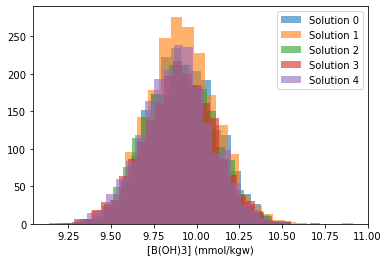

In [15]:
for i, g in mc_out.groupby(level=0):
    if i <= 4:
        plt.hist(g.loc[:, ('molality (mol/kgw)', 'B(OH)3')] * 1e3, 25, alpha=0.6, label=f'Solution {i}')
    
plt.xlabel('[B(OH)3] (mmol/kgw)')
plt.legend()

Or used to calculate uncertainty quantiles for each sample. You can do this using standard pandas.DataFrame operations, or using a pre-built convenience function:

In [16]:
from blazy import calc_mc_quantiles

In [17]:
calc_mc_quantiles(out)

general                                             \
                    sim  soln dist_x  time  step   pH   pe temp(C)   
sample quantile                                                      
0      0.025        1.0   0.0  -99.0 -99.0 -99.0  7.0  4.0    25.0   
       0.500        1.0   0.0  -99.0 -99.0 -99.0  7.0  4.0    25.0   
       0.975        1.0   0.0  -99.0 -99.0 -99.0  7.0  4.0    25.0   
1      0.025        1.0   1.0  -99.0 -99.0 -99.0  7.0  4.0    25.0   
       0.500        1.0   1.0  -99.0 -99.0 -99.0  7.0  4.0    25.0   
...                 ...   ...    ...   ...   ...  ...  ...     ...   
37     0.500        1.0  37.0  -99.0 -99.0 -99.0  7.0  4.0    25.0   
       0.975        1.0  37.0  -99.0 -99.0 -99.0  7.0  4.0    25.0   
38     0.025        1.0  38.0  -99.0 -99.0 -99.0  7.0  4.0    25.0   
       0.500        1.0  38.0  -99.0 -99.0 -99.0  7.0  4.0    25.0   
       0.975        1.0  38.0  -99.0 -99.0 -99.0  7.0  4.0    25.0   

                                      total (mol/kgw) molality (mol/kgw)  \
                Alk(eq/kgw)        mu               C                 H+   
sample quantile                                                            
0      0.025       0.000074  0.080194             0.0       1.236312e-07   
       0.500       0.000074  0.080194             0.0       1.236312e-07   
       0.975       0.000074  0.080194             0.0       1.236312e-07   
1      0.025       0.000086  0.280193             0.0       1.310141e-07   
       0.500       0.000086  0.280193             0.0       1.310141e-07   
...                     ...       ...             ...                ...   
37     0.500       0.000187  5.150027             0.0       2.054833e-08   
       0.975       0.000187  5.150027             0.0       2.054833e-08   
38     0.025       0.000232  6.150033             0.0       1.321118e-08   
       0.500       0.000232  6.150033             0.0       1.321118e-08   
       0.975       0.000232  6.150033             0.0       1.321118e-08   

                                                     log10(saturation)  
                HCO3- CO3-2  CO2           OH- MgCO3            CO2(g)  
sample quantile                                                         
0      0.025      0.0   0.0  0.0  1.269332e-07   0.0               NaN  
       0.500      0.0   0.0  0.0  1.269332e-07   0.0               NaN  
       0.975      0.0   0.0  0.0  1.269332e-07   0.0               NaN  
1      0.025      0.0   0.0  0.0  1.385442e-07   0.0               NaN  
       0.500      0.0   0.0  0.0  1.385442e-07   0.0               NaN  
...               ...   ...  ...           ...   ...               ...  
37     0.500      0.0   0.0  0.0  2.411405e-07   0.0               NaN  
       0.975      0.0   0.0  0.0  2.411405e-07   0.0               NaN  
38     0.025      0.0   0.0  0.0  2.448261e-07   0.0               NaN  
       0.500      0.0   0.0  0.0  2.448261e-07   0.0               NaN  
       0.975      0.0   0.0  0.0  2.448261e-07   0.0               NaN  

[117 rows x 18 columns]